In [1]:
%load_ext rpy2.ipython

import pandas as pd
from metasub_utils.packet_parse import MetaSUBTableFactory
from capalyzer.packet_parser.experimental import umap
import warnings

warnings.filterwarnings('ignore')

core_tabler = MetaSUBTableFactory.core_factory()

/home/dcdanko/miniconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
%%R

library(ggthemes)
library(ggplot2)
library(reshape2)
library(gridExtra)
library(ALDEx2)
library(RColorBrewer)

In [3]:
rps = core_tabler.read_props()
rps['continent'] = core_tabler.metadata['continent']
rps['surface'] = core_tabler.metadata['surface_ontology_fine']
rps = rps.dropna()
rps['continent'] = [str(el) for el in rps['continent']]
rps['surface'] = [str(el) for el in rps['surface']]
rps.head()

,total,host,unknown,nonhost_macrobial,bacterial,archaeal,viral,nonfungal_eukaryotic,fungal,eukaryotic,continent,surface
haib18CEM5453_HNHKFCCXY_SL346123,1.0,0.145291,0.349884,0.001732,0.502575,0.0,0.000518,0.000000,0.0,0.0,east_asia,metal
haib17CEM4890_HMCMJCCXY_SL335864,1.0,0.284898,0.551967,0.022146,0.137794,0.0,0.000478,0.002717,0.0,0.0,north_america,metal
haib17CEM5241_HMGMHCCXY_SL343447,1.0,0.034212,0.458618,0.001452,0.504598,0.0,0.000000,0.001121,0.0,0.0,europe,biological
haib18CEM5453_HMC2KCCXY_SL336815,1.0,0.446431,0.290991,0.001278,0.260829,0.0,0.000472,0.000000,0.0,0.0,east_asia,plastic
haib17CEM5241_HMGMHCCXY_SL343507,1.0,0.007242,0.691738,0.030248,0.270771,0.0,0.000000,0.000000,0.0,0.0,east_asia,metal


In [4]:
non_human_unkown = (rps['unknown'] / (1 - rps['host'])).mean()
non_human_known = 1 - non_human_unkown

100 * non_human_known

40.68521921149348

In [6]:
non_human_blast_nt_aligned = (core_tabler.csv_in_dir('other/nt_aligned_counts.csv') / 10000)
print(non_human_blast_nt_aligned.shape)
100 * non_human_blast_nt_aligned.mean()

(159, 1)


reads_aligned    46.71805
dtype: float64

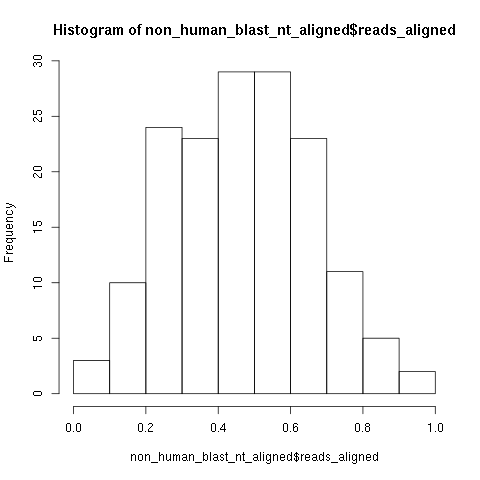

In [7]:
%%R -i non_human_blast_nt_aligned

hist(non_human_blast_nt_aligned$reads_aligned)

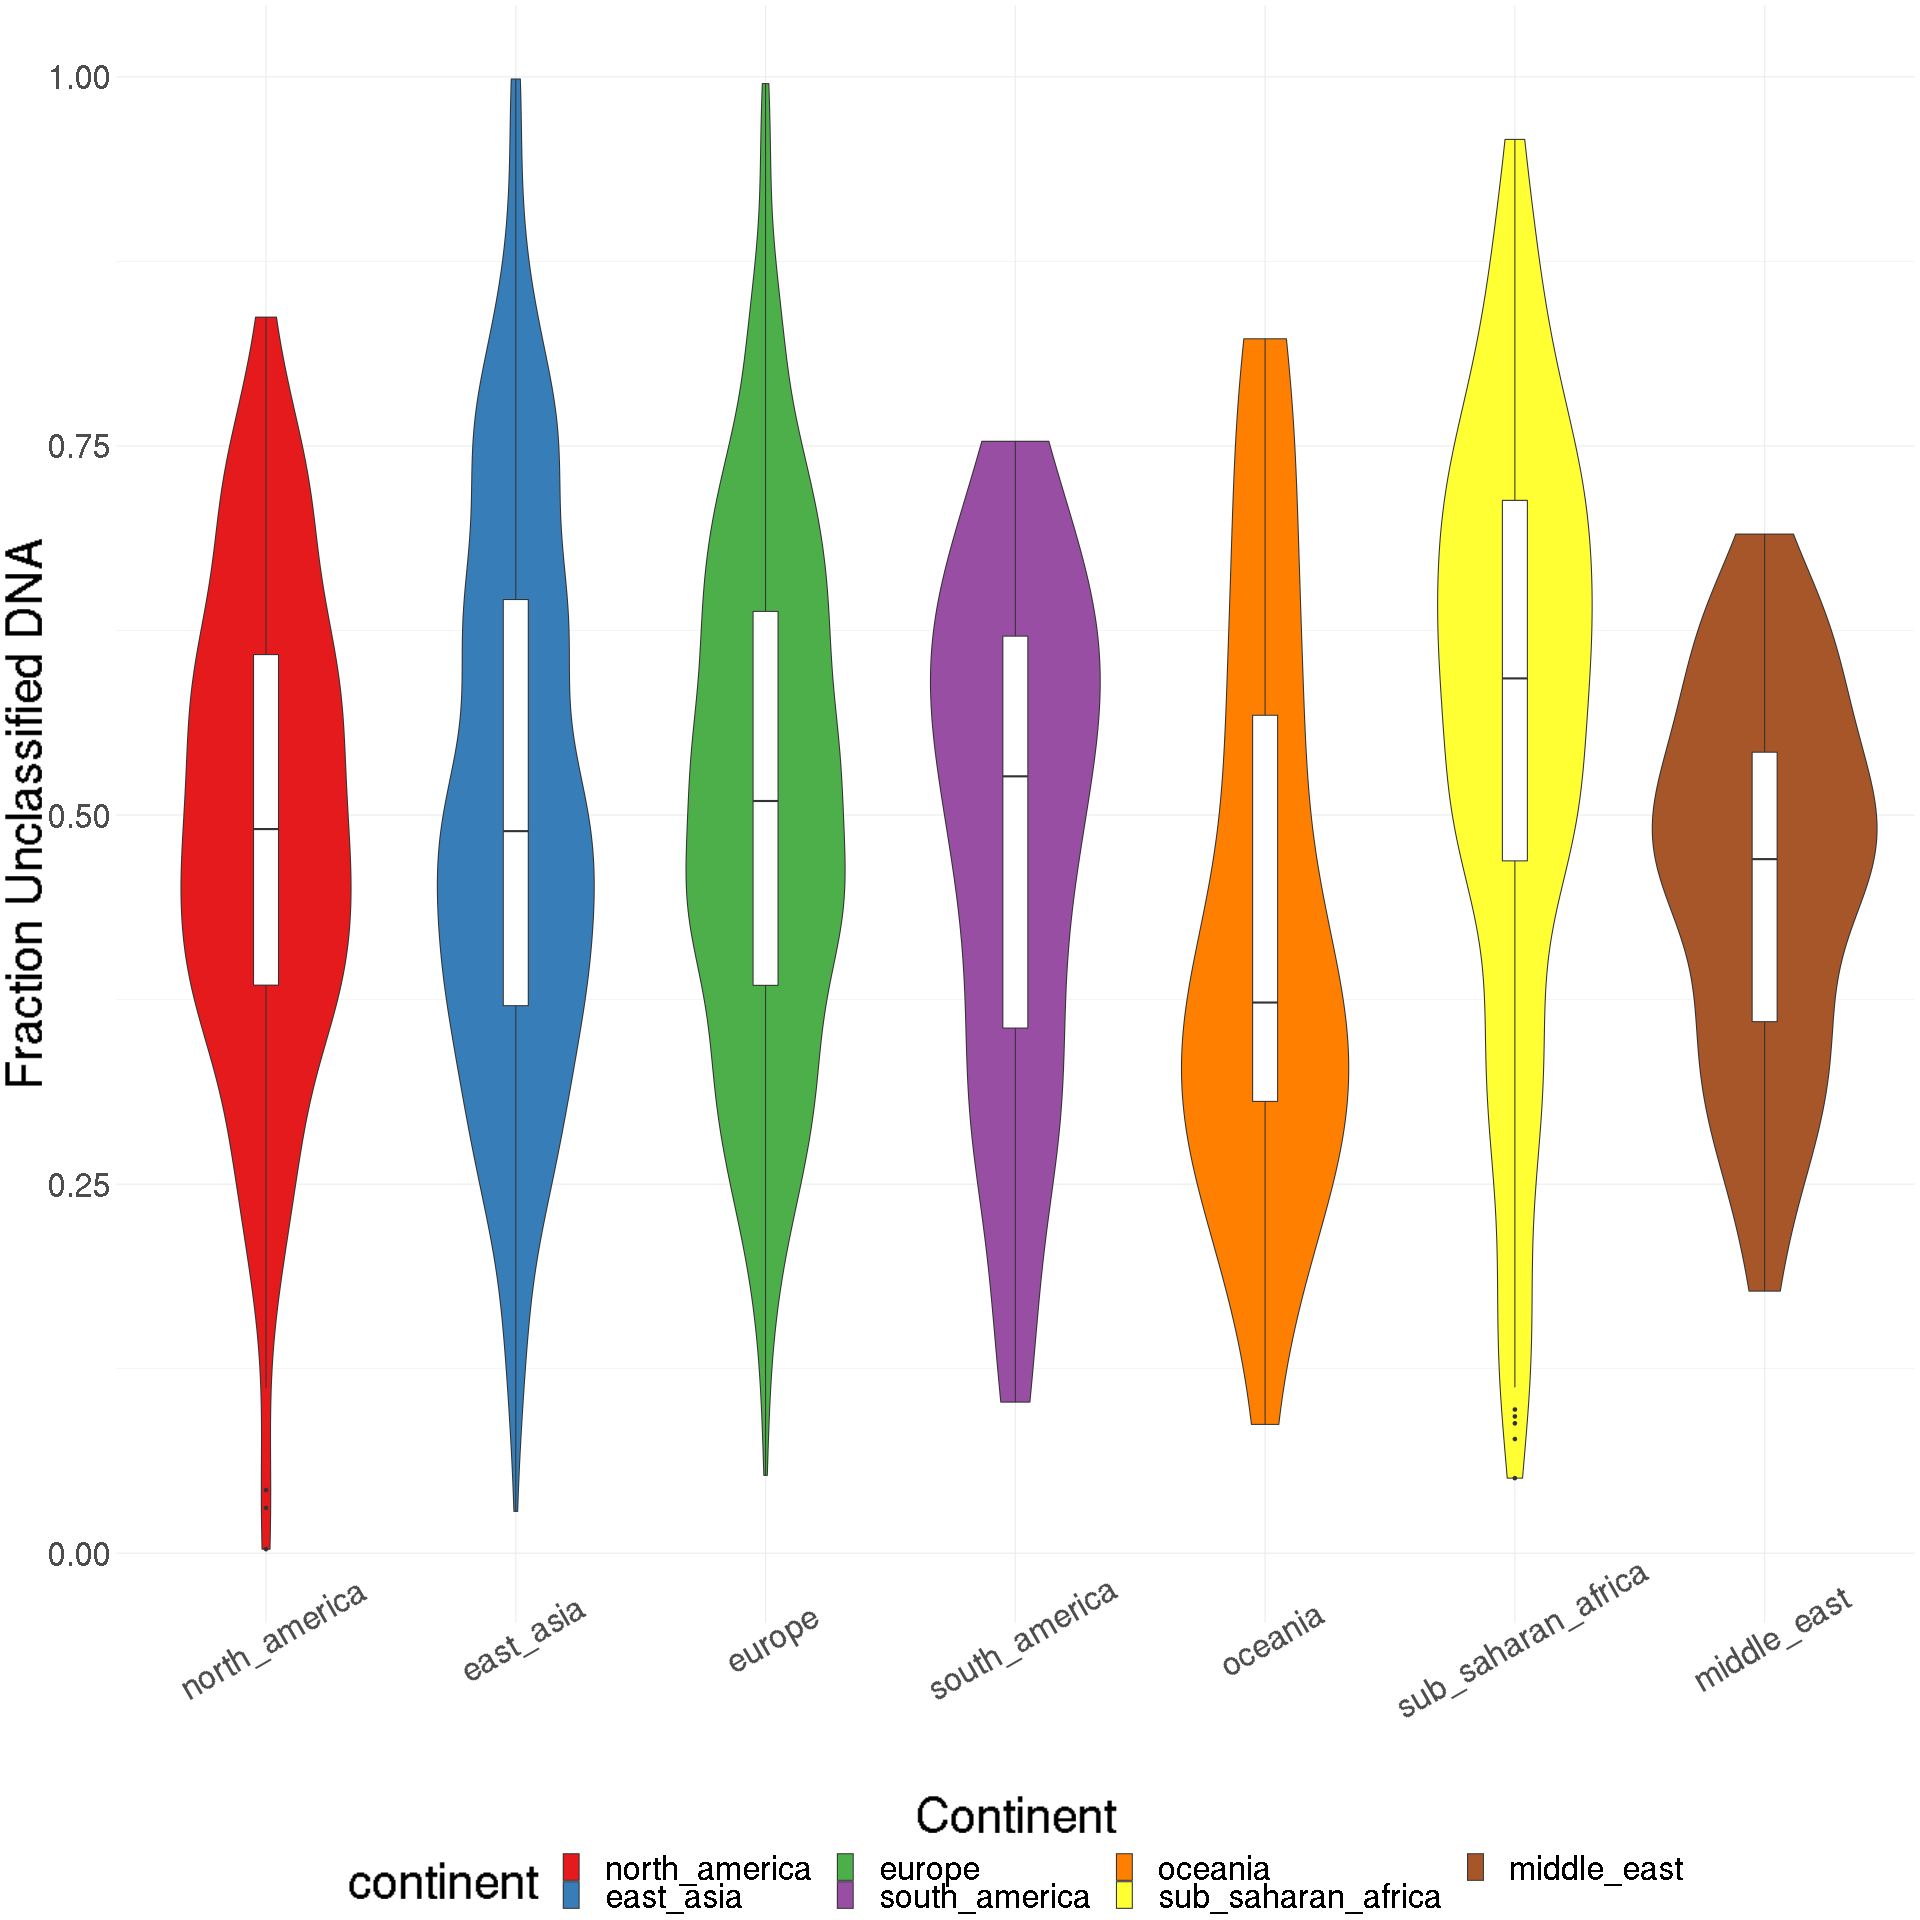

In [8]:
%%R -i rps -w 1920 -h 1920

continents =  c(
        'north_america',
        'east_asia',
        'europe',
        'south_america',
        'oceania',
        'sub_saharan_africa',
        'middle_east'
)
rps$continent = ordered(
    rps$continent,
    levels=continents
)
ggplot(rps[rps$continent %in% continents,], aes(x=continent, y=unknown, fill=continent)) +
    geom_violin() +
    geom_boxplot(fill='white', width=0.1) +
    theme_minimal() +
    scale_fill_brewer(palette='Set1') +
    xlab('Continent') +
    ylab('Fraction Unclassified DNA') +
    theme(
        text = element_text(size=50),
        legend.position='bottom',
        axis.text.x= element_text(angle=30),
    )
    

In [11]:
hmp = pd.read_csv(core_tabler.packet_dir + '/other/metasub_hmp_mash_comparison.csv', names=['sample_name', 'hmp_sample', 'hmp_site_fine', 'body_site', 'jaccard', 'pval', 'hashes'])
hmp = hmp.loc[hmp['sample_name'].isin(core_tabler.metadata.index)]
hmp['continent'] = [core_tabler.metadata.loc[sn]['continent'] for sn in hmp['sample_name']]
hmp['surface'] = [core_tabler.metadata.loc[sn]['surface_ontology_fine'] for sn in hmp['sample_name']]
hmp = hmp.dropna()
hmp['continent'] = [str(el) for el in hmp['continent']]
hmp['surface'] = [str(el) for el in hmp['surface']]
hmp.head()

,sample_name,hmp_sample,hmp_site_fine,body_site,jaccard,pval,hashes,continent,surface
0,haib18CEM5453_HT5YVCCXY_SL357303,SRS019019,anterior_nares,airways,0.175330,0.0,127477/10000000,east_asia,metal
1,haib18CEM5453_HT5YVCCXY_SL357303,SRS020868,anterior_nares,airways,0.201916,0.0,72543/10000000,east_asia,metal
2,haib18CEM5453_HT5YVCCXY_SL357303,SRS018463,anterior_nares,airways,0.241190,0.0,31670/10000000,east_asia,metal
3,haib18CEM5453_HT5YVCCXY_SL357303,SRS020232,anterior_nares,airways,0.170387,0.0,141618/10000000,east_asia,metal
4,haib18CEM5453_HT5YVCCXY_SL357303,SRS051600,anterior_nares,airways,0.271542,0.0,16718/10000000,east_asia,metal


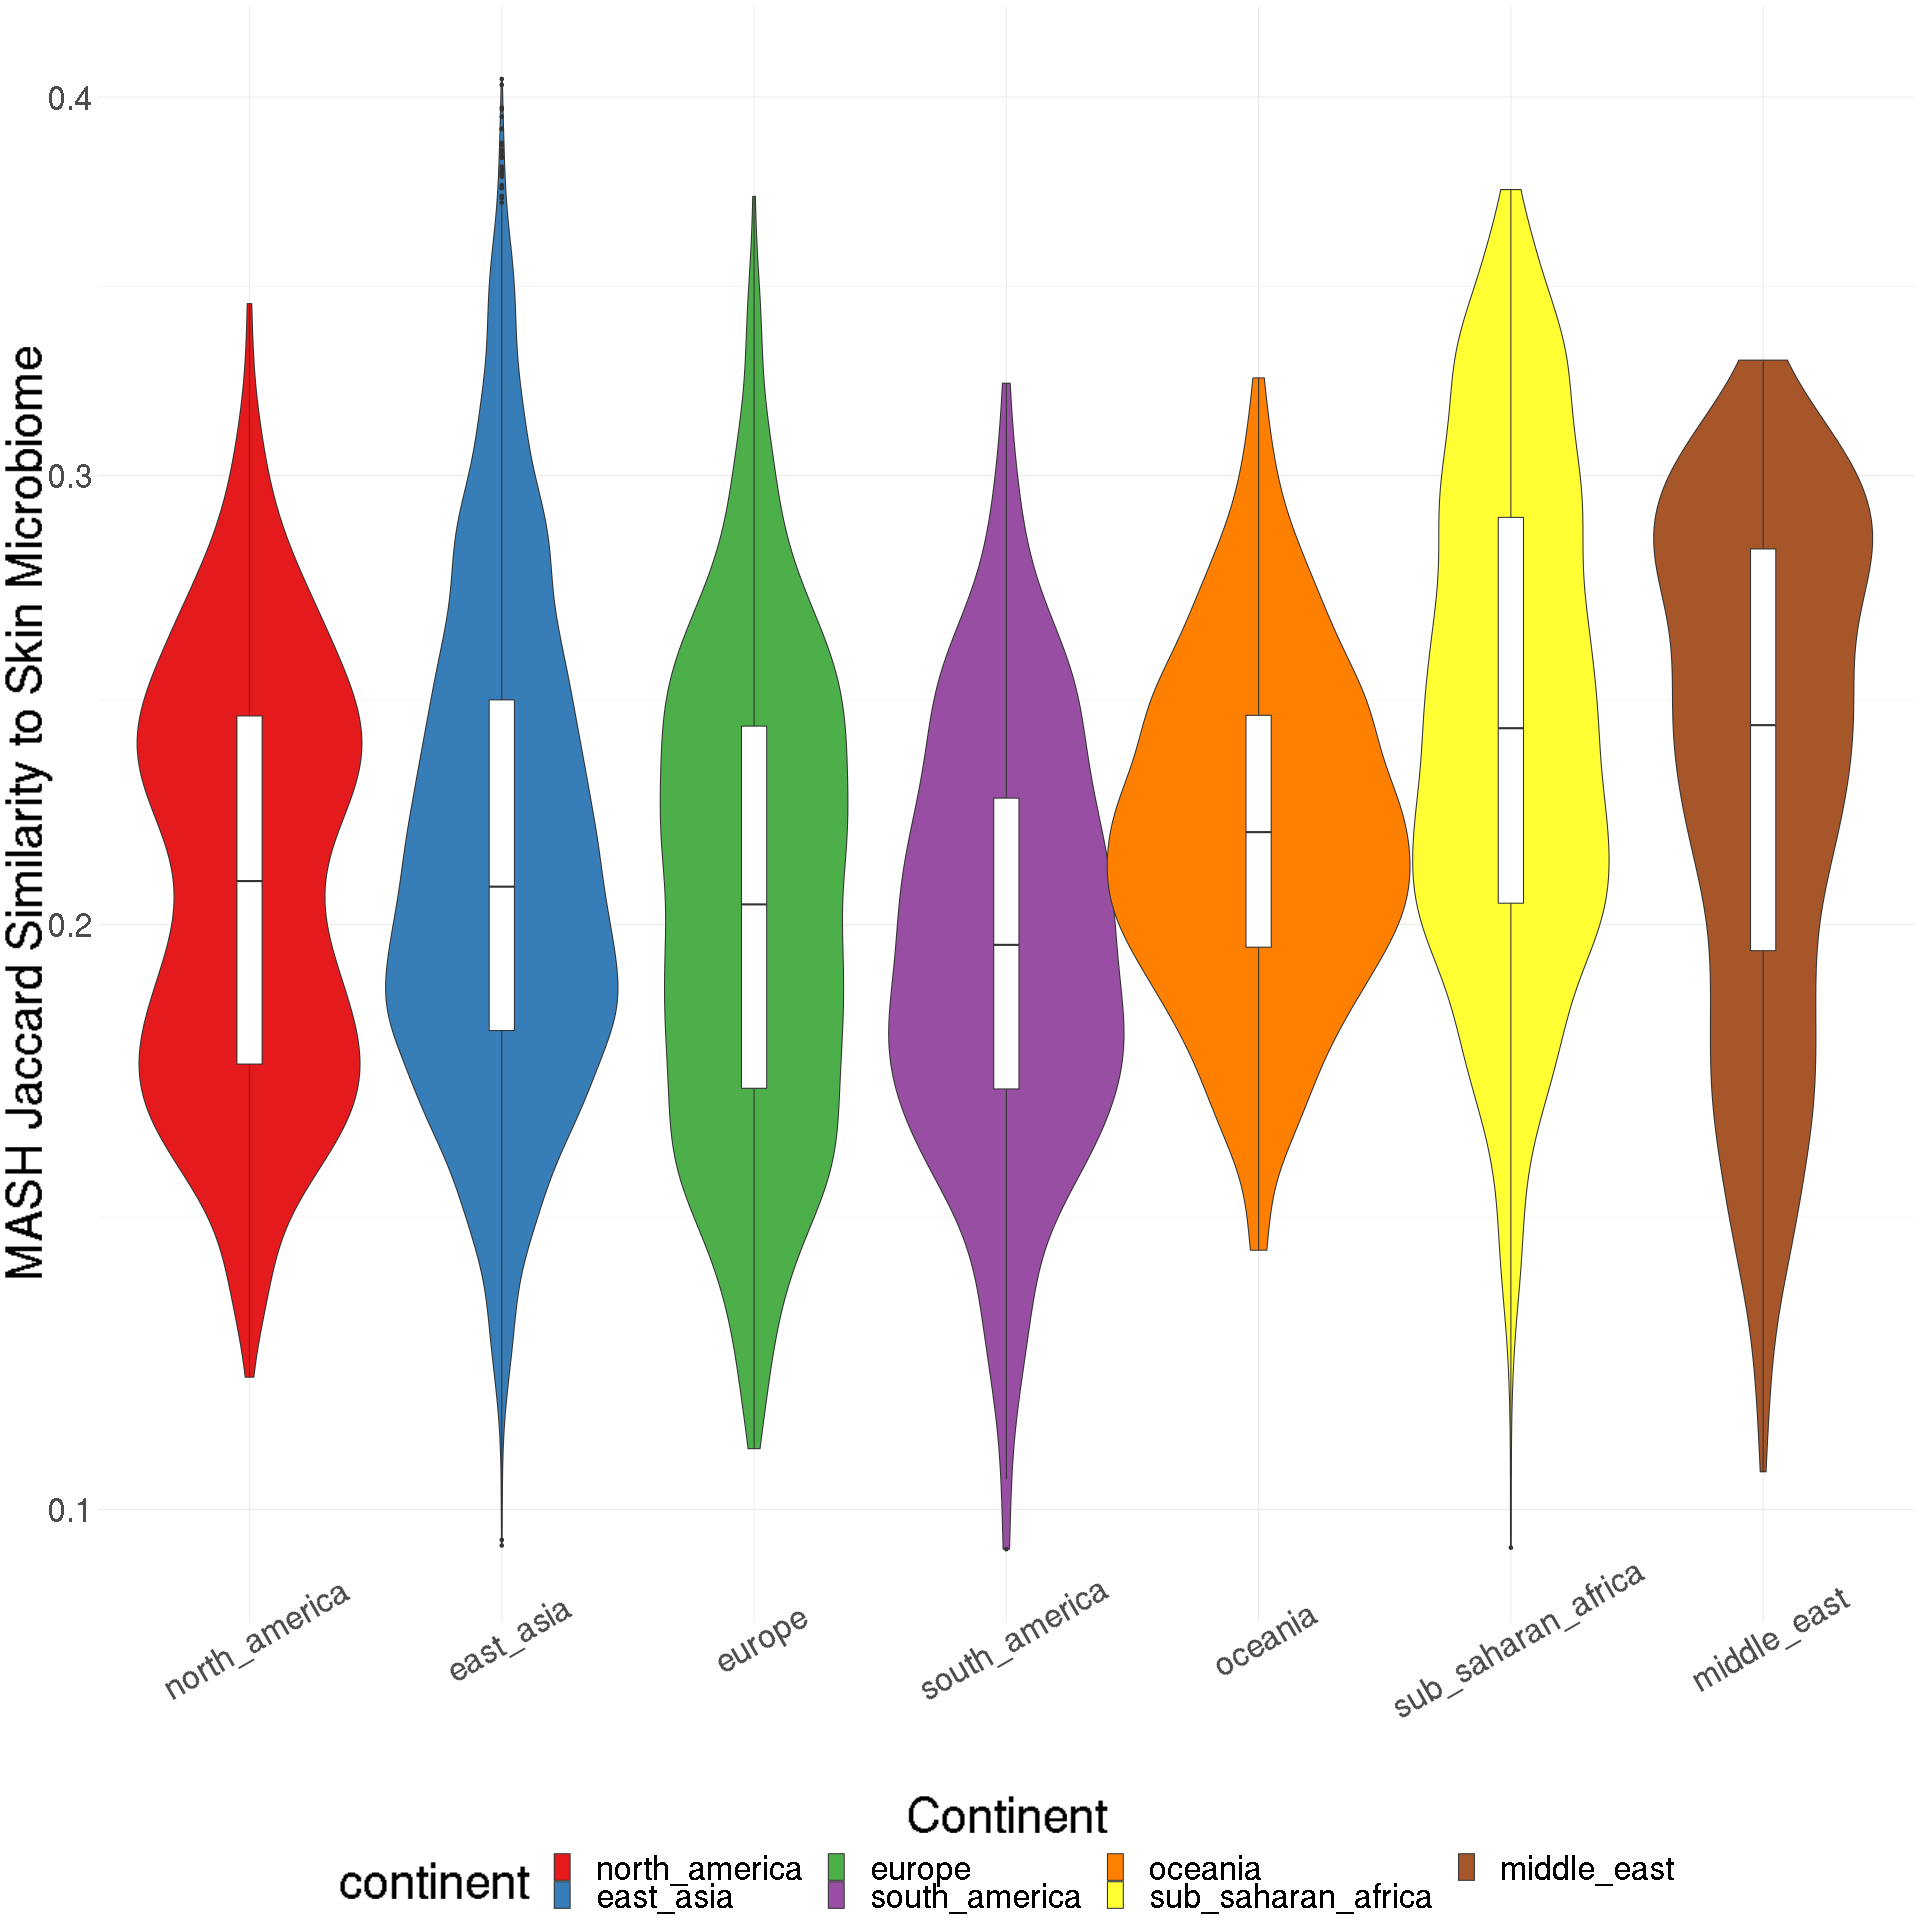

In [12]:
%%R -i hmp -w 1920 -h 1920

continents =  c(
        'north_america',
        'east_asia',
        'europe',
        'south_america',
        'oceania',
        'sub_saharan_africa',
        'middle_east'
)
hmp$continent = ordered(
    hmp$continent,
    levels=continents
)
skin = hmp[hmp$body_site == 'skin',]
ggplot(skin[skin$continent %in% continents,], aes(x=continent, y=jaccard, fill=continent)) +
    geom_violin(width=1.2) +
    geom_boxplot(fill='white', width=0.1) +
    theme_minimal() +
    scale_y_sqrt() +
    scale_fill_brewer(palette='Set1') +
    xlab('Continent') +
    ylab('MASH Jaccard Similarity to Skin Microbiome') +
    theme(
        text = element_text(size=50),
        legend.position='bottom',
        axis.text.x= element_text(angle=30),
    ) 

## Supplementary

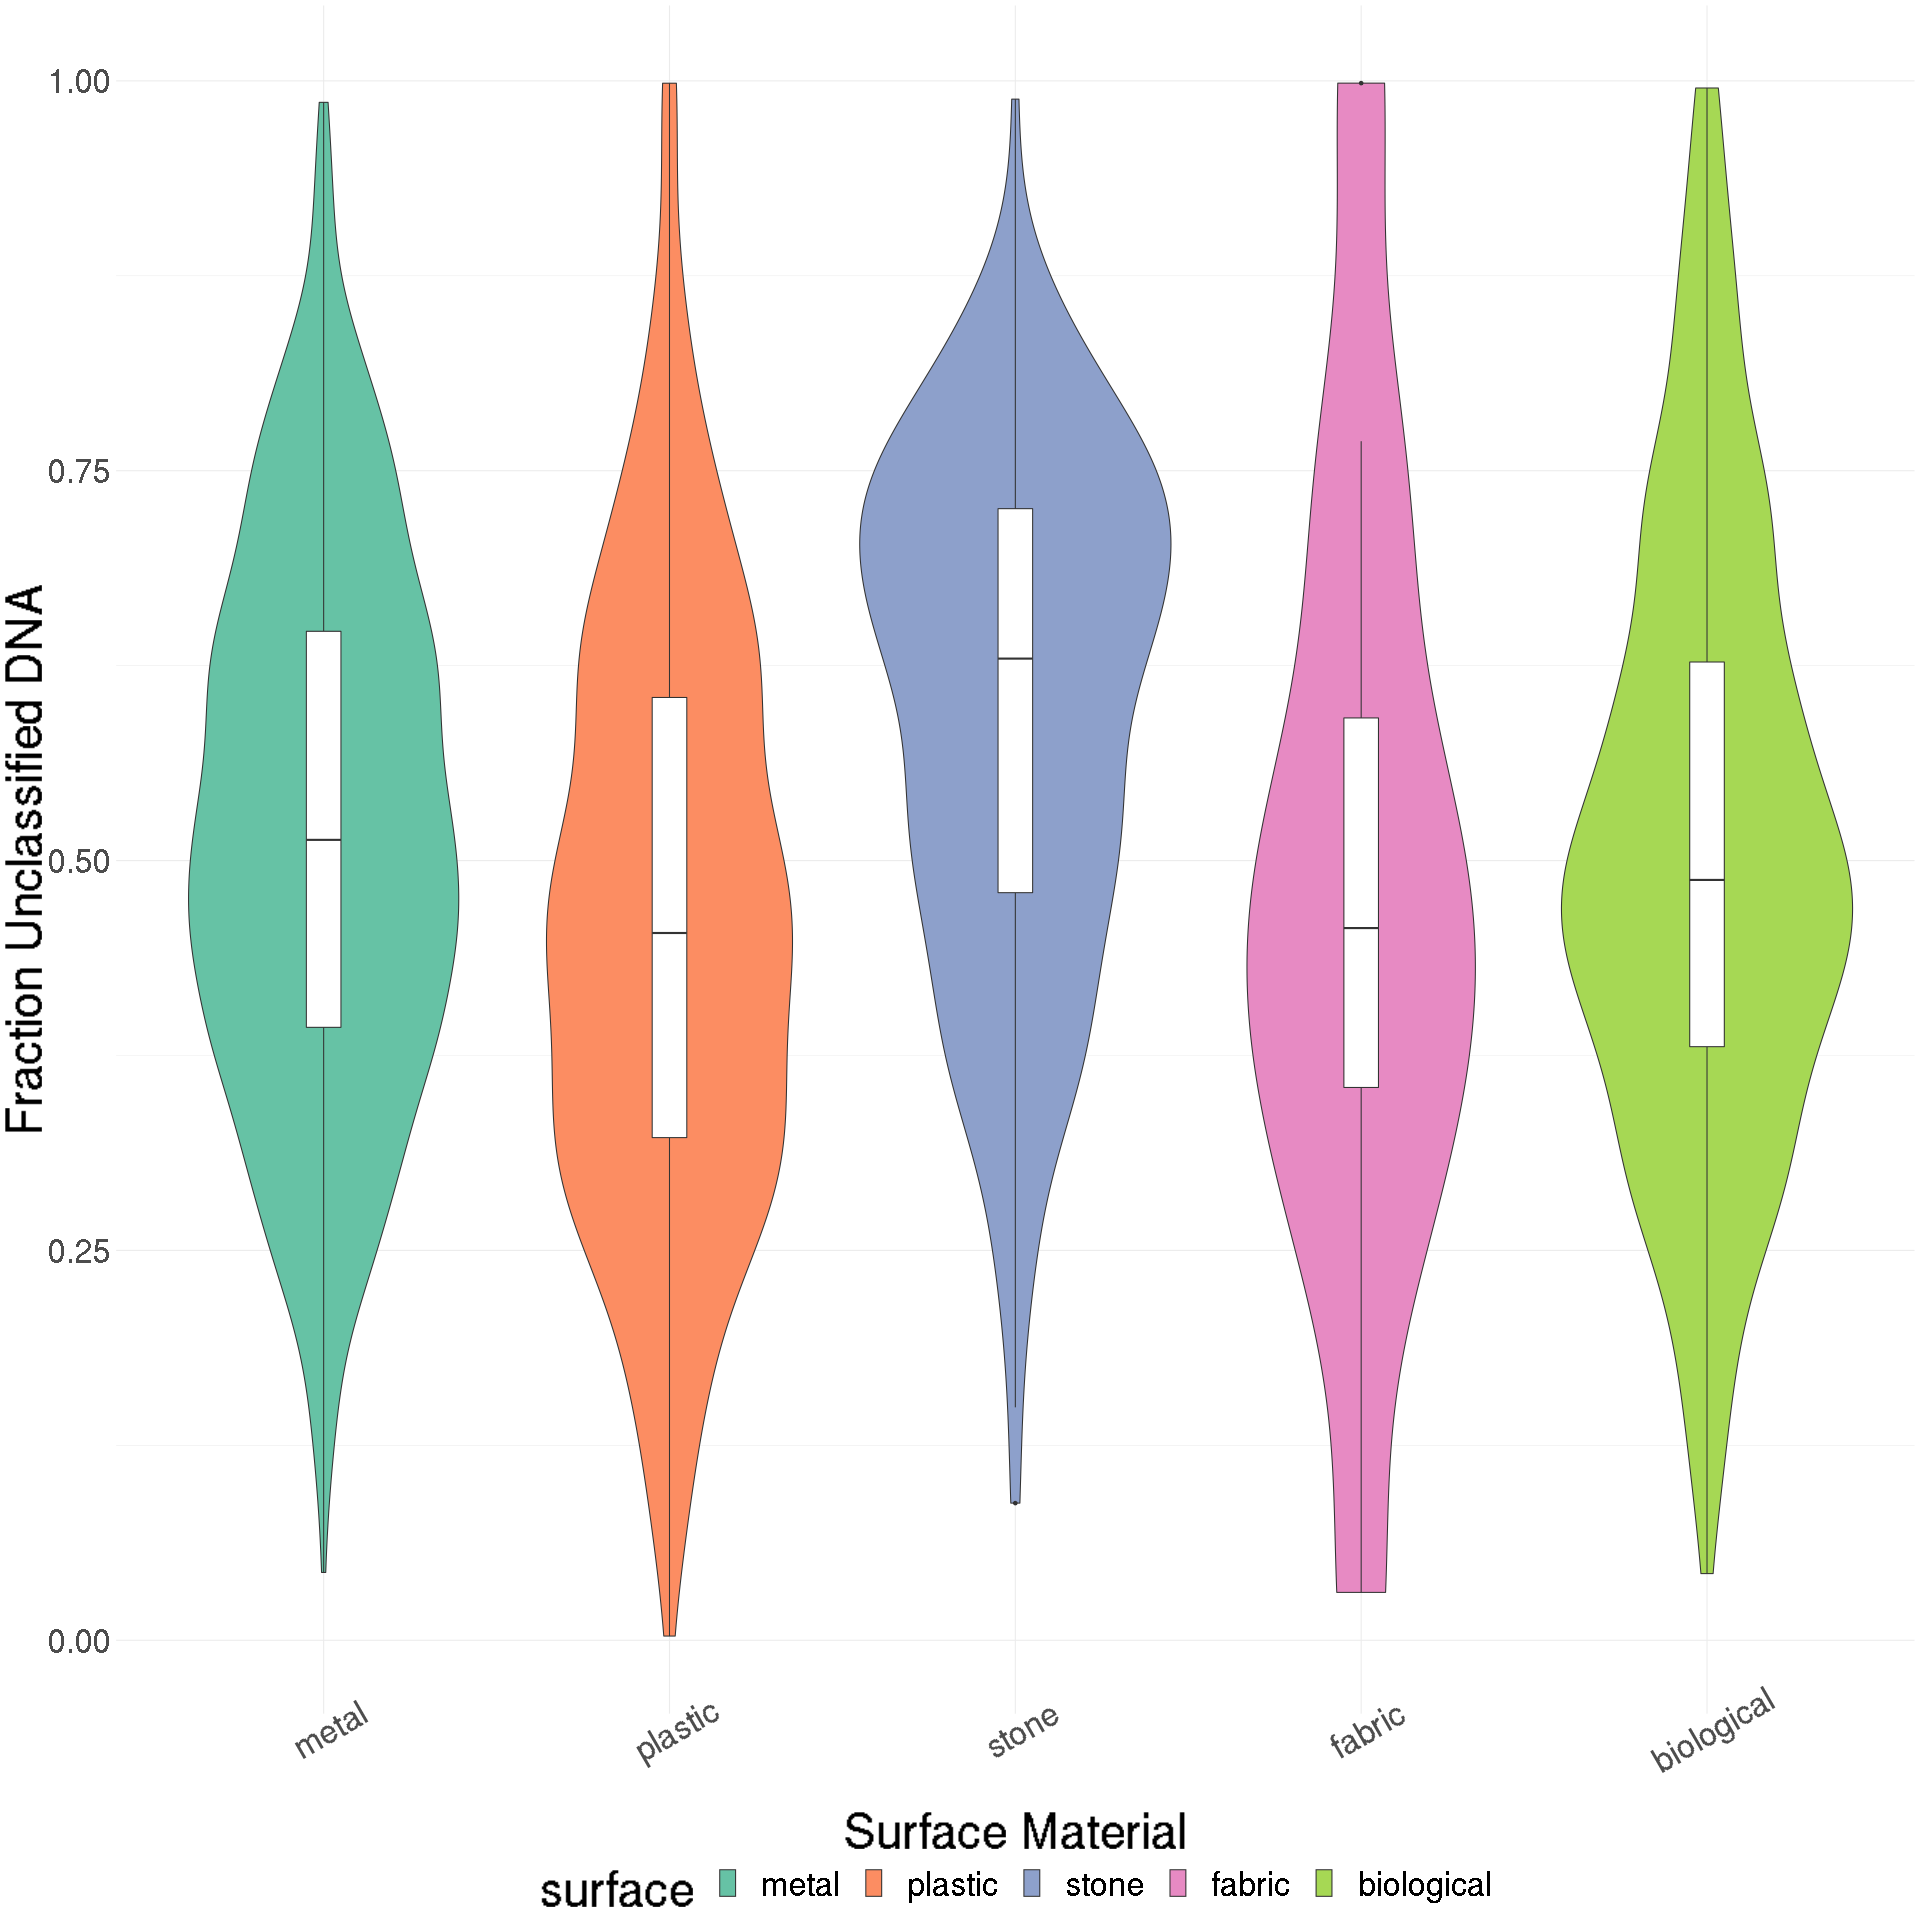

In [13]:
%%R -i rps -w 1920 -h 1920

surfaces = c('metal', 'plastic', 'stone', 'fabric', 'biological')
rps$surface = ordered(rps$surface, levels=surfaces)
ggplot(rps[rps$surface %in% surfaces,], aes(x=surface, y=unknown, fill=surface)) +
    geom_violin() +
    geom_boxplot(fill='white', width=0.1) +
    theme_minimal() +
    scale_fill_brewer(palette='Set2') +
    xlab('Surface Material') +
    ylab('Fraction Unclassified DNA') +
    theme(
        text = element_text(size=50),
        legend.position='bottom',
        axis.text.x= element_text(angle=30),
    ) 

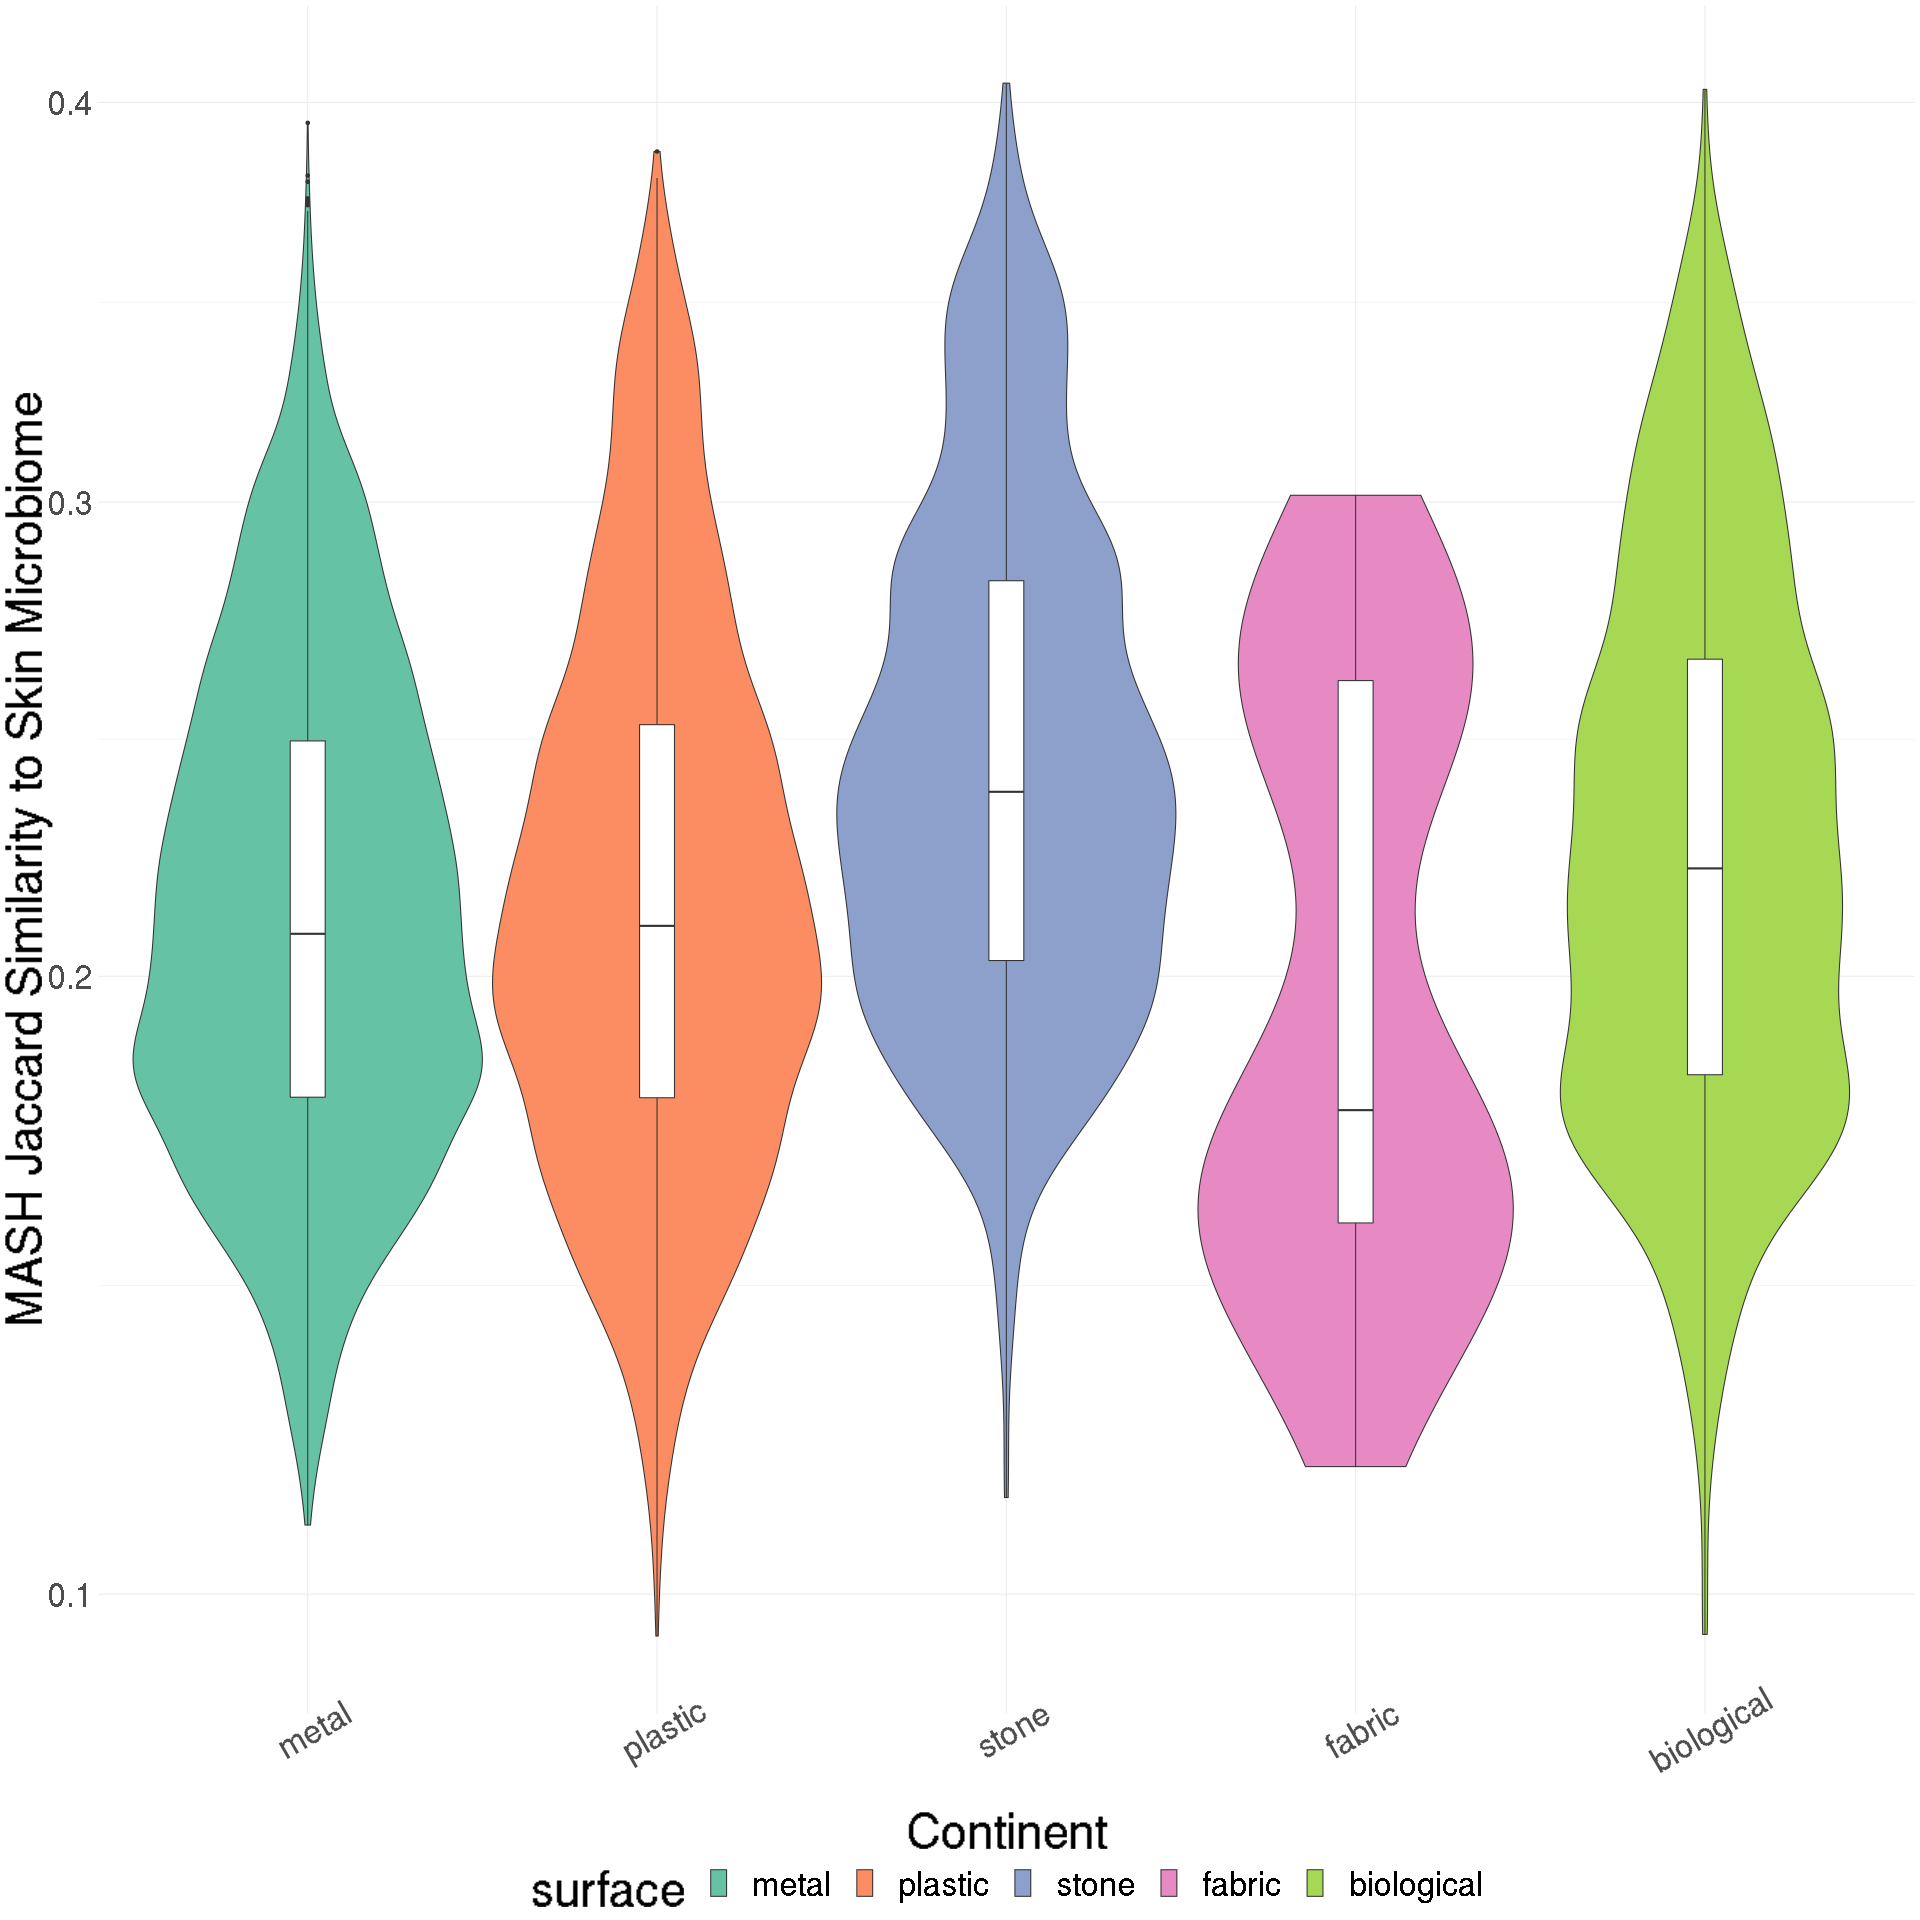

In [14]:
%%R -i hmp -w 1920 -h 1920

surfaces = c('metal', 'plastic', 'stone', 'fabric', 'biological')
hmp$surface = ordered(hmp$surface, levels=surfaces)
skin = hmp[hmp$body_site == 'skin',]
ggplot(skin[skin$surface %in% surfaces,], aes(x=surface, y=jaccard, fill=surface)) +
    geom_violin(width=1.) +
    geom_boxplot(fill='white', width=0.1) +
    theme_minimal() +
    scale_y_sqrt() +
    scale_fill_brewer(palette='Set2') +
    xlab('Continent') +
    ylab('MASH Jaccard Similarity to Skin Microbiome') +
    theme(
        text = element_text(size=50),
        legend.position='bottom',
        axis.text.x= element_text(angle=30),
    ) 

In [19]:
hmp = pd.read_csv(core_tabler.packet_dir + '/other/metasub_hmp_mash_comparison.csv', names=['sample_name', 'hmp_sample', 'hmp_site_fine', 'body_site', 'jaccard', 'pval', 'hashes'])
hmp = hmp.loc[hmp['sample_name'].isin(core_tabler.metadata.index)]
hmp['continent'] = [core_tabler.metadata.loc[sn]['continent'] for sn in hmp['sample_name']]
hmp['surface'] = [core_tabler.metadata.loc[sn]['surface_ontology_fine'] for sn in hmp['sample_name']]
hmp = hmp.dropna()
hmp['continent'] = [str(el) for el in hmp['continent']]
hmp['surface'] = [str(el) for el in hmp['surface']]
hmp.head()

,sample_name,hmp_sample,hmp_site_fine,body_site,jaccard,pval,hashes,continent,surface
0,haib18CEM5453_HT5YVCCXY_SL357303,SRS019019,anterior_nares,airways,0.175330,0.0,127477/10000000,east_asia,metal
1,haib18CEM5453_HT5YVCCXY_SL357303,SRS020868,anterior_nares,airways,0.201916,0.0,72543/10000000,east_asia,metal
2,haib18CEM5453_HT5YVCCXY_SL357303,SRS018463,anterior_nares,airways,0.241190,0.0,31670/10000000,east_asia,metal
3,haib18CEM5453_HT5YVCCXY_SL357303,SRS020232,anterior_nares,airways,0.170387,0.0,141618/10000000,east_asia,metal
4,haib18CEM5453_HT5YVCCXY_SL357303,SRS051600,anterior_nares,airways,0.271542,0.0,16718/10000000,east_asia,metal


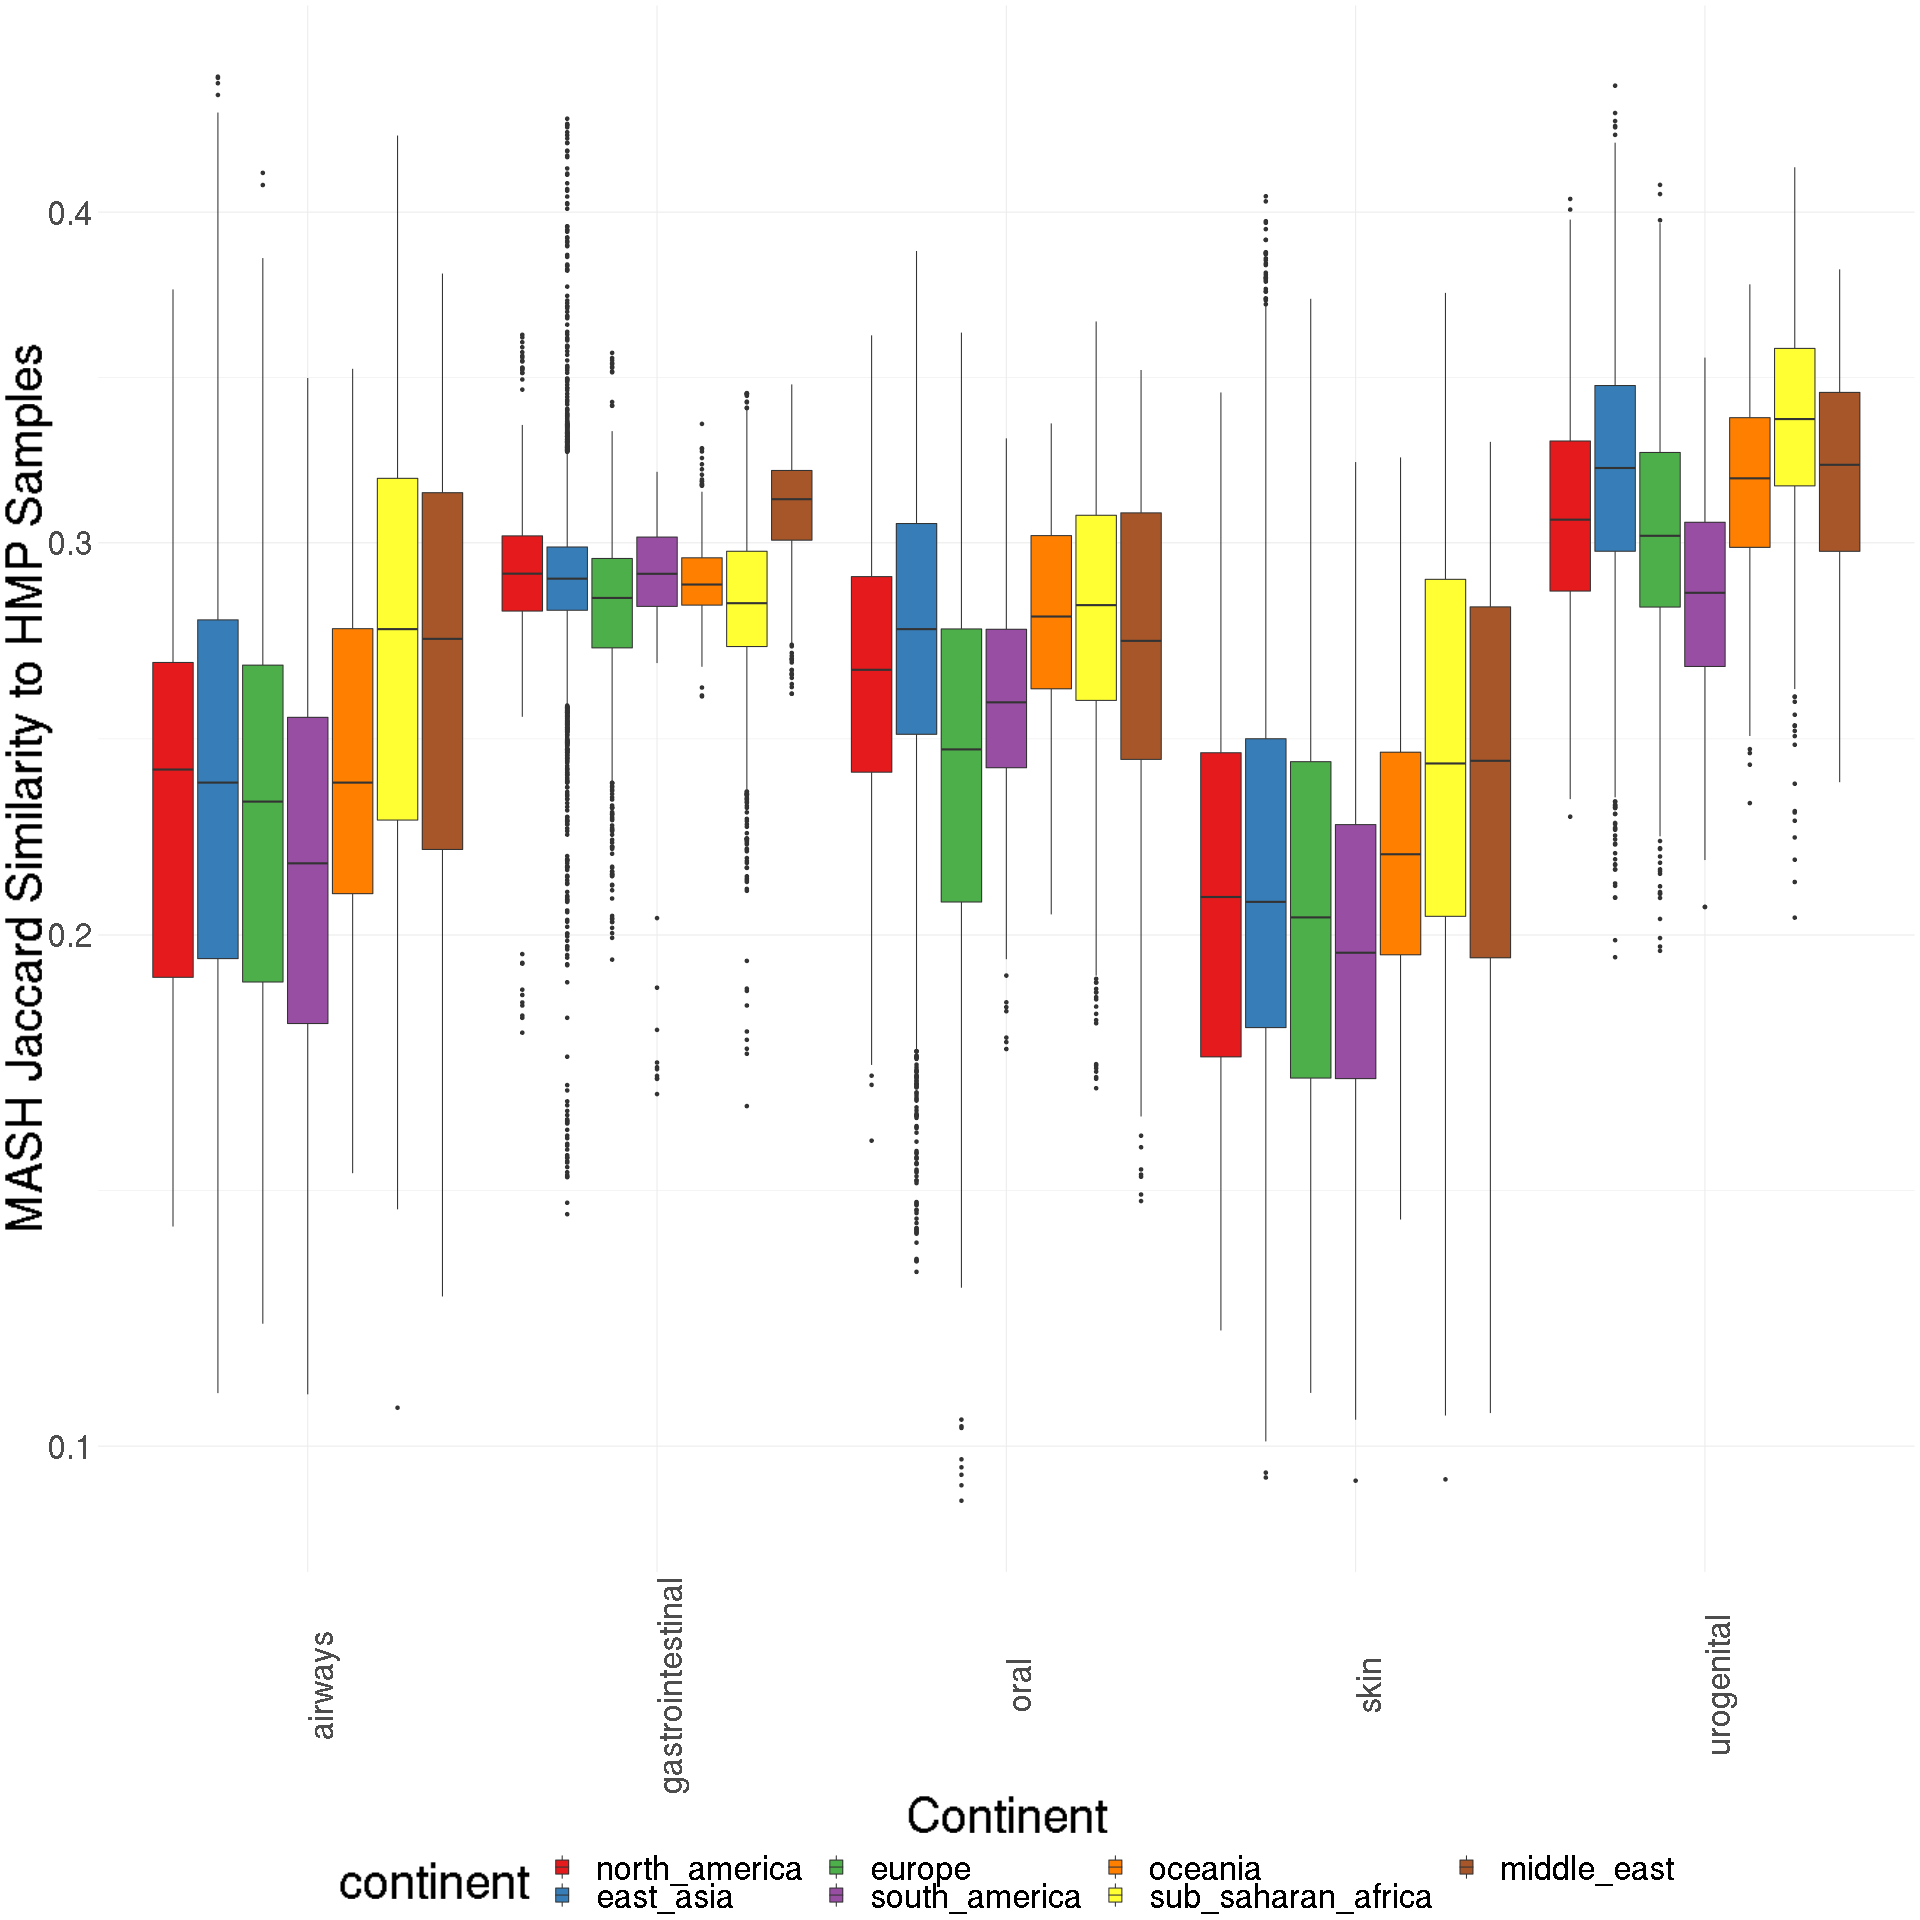

In [20]:
%%R -i hmp -w 1920 -h 1920

continents =  c(
        'north_america',
        'east_asia',
        'europe',
        'south_america',
        'oceania',
        'sub_saharan_africa',
        'middle_east'
)
hmp$continent = ordered(
    hmp$continent,
    levels=continents
)
ggplot(hmp, aes(x=body_site, y=jaccard, fill=continent)) +
    geom_boxplot(width=0.9) +
    theme_minimal() +
    scale_y_sqrt() +
    scale_fill_brewer(palette='Set1') +
    xlab('Continent') +
    ylab('MASH Jaccard Similarity to HMP Samples') +
    theme(
        text = element_text(size=50),
        legend.position='bottom',
        axis.text.x= element_text(angle=90),
    ) 

In [21]:
hmp = core_tabler.hmp()
hmp = hmp.loc[hmp['sample_name'].isin(core_tabler.metadata.index)]
hmp['continent'] = [core_tabler.metadata.loc[sn]['continent'] for sn in hmp['sample_name']]
hmp['surface'] = [core_tabler.metadata.loc[sn]['surface_ontology_fine'] for sn in hmp['sample_name']]
hmp = hmp.dropna()
hmp['continent'] = [str(el) for el in hmp['continent']]
hmp['surface'] = [str(el) for el in hmp['surface']]
hmp.head()

,sample_name,body_site,distance,continent,surface
0,haib18CEM5453_HT5YVCCXY_SL357303,airways,0.931949,east_asia,metal
1,haib18CEM5453_HT5YVCCXY_SL357303,airways,0.236694,east_asia,metal
2,haib18CEM5453_HT5YVCCXY_SL357303,airways,0.244629,east_asia,metal
3,haib18CEM5453_HT5YVCCXY_SL357303,airways,0.968289,east_asia,metal
4,haib18CEM5453_HT5YVCCXY_SL357303,airways,0.073263,east_asia,metal


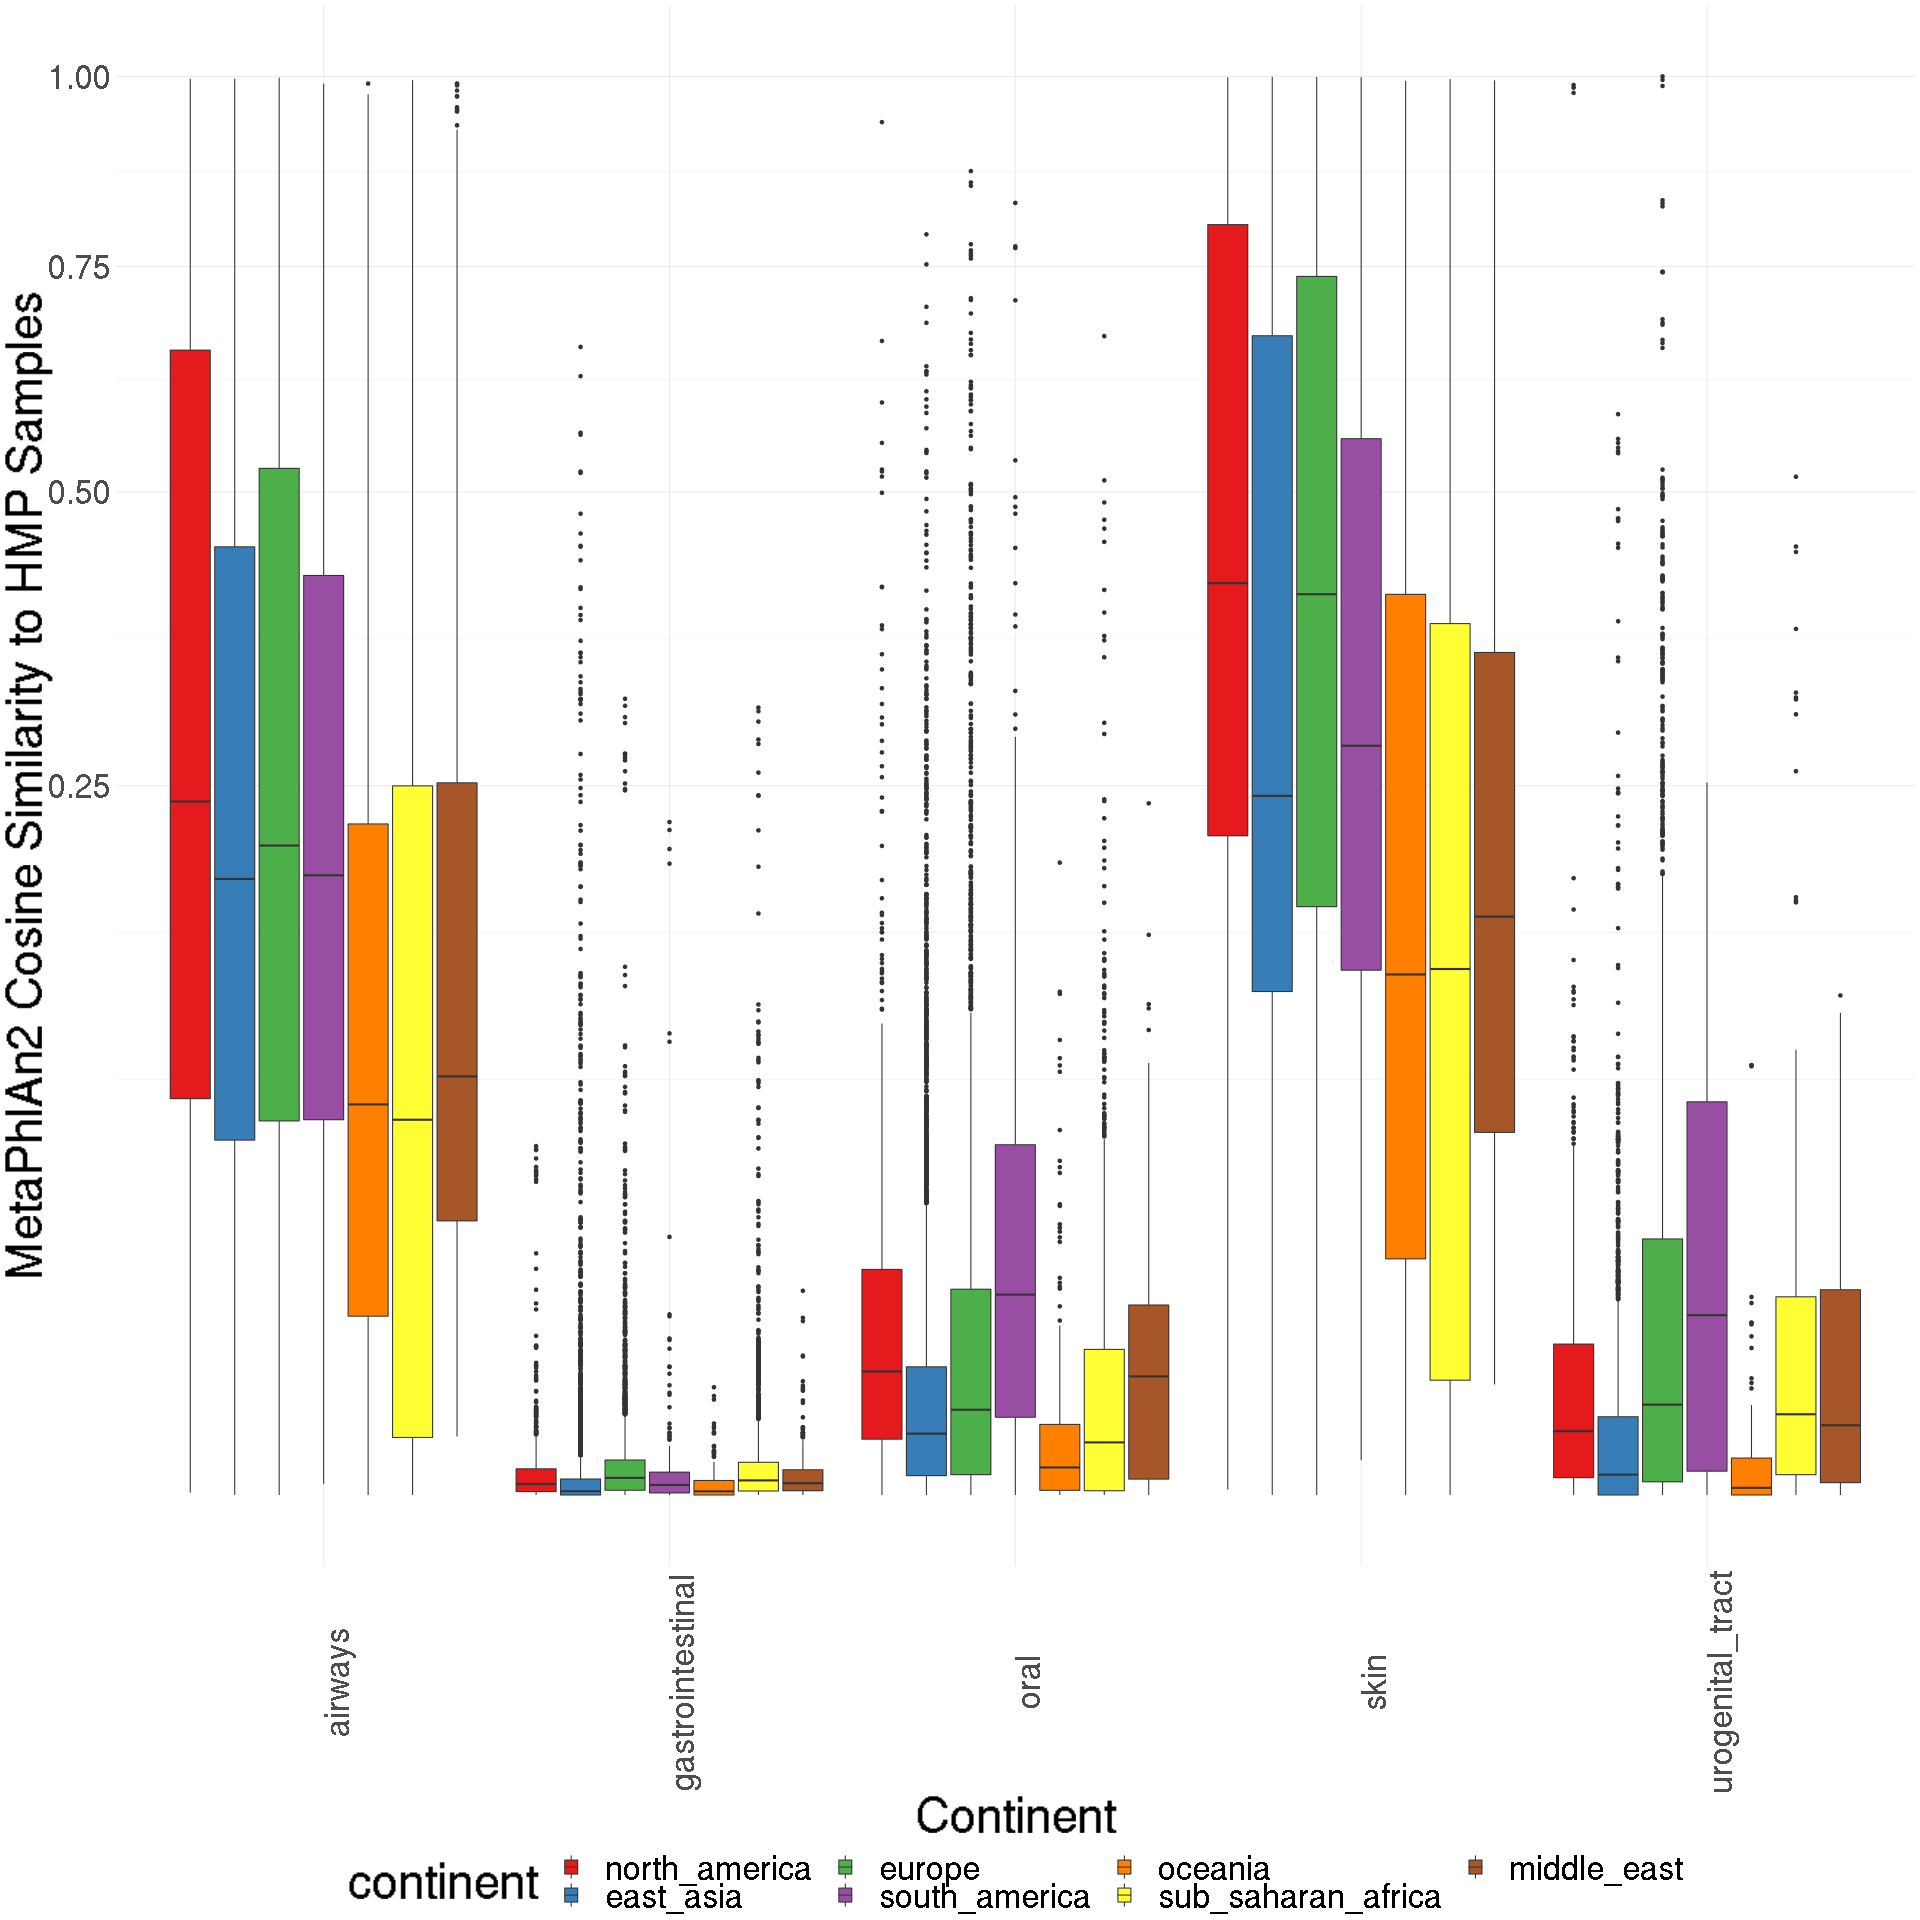

In [22]:
%%R -i hmp -w 1920 -h 1920

continents =  c(
        'north_america',
        'east_asia',
        'europe',
        'south_america',
        'oceania',
        'sub_saharan_africa',
        'middle_east'
)
hmp$continent = ordered(
    hmp$continent,
    levels=continents
)
ggplot(hmp, aes(x=body_site, y=distance, fill=continent)) +
    geom_boxplot(width=0.9) +
    theme_minimal() +
    scale_y_sqrt() +
    scale_fill_brewer(palette='Set1') +
    xlab('Continent') +
    ylab('MetaPhlAn2 Cosine Similarity to HMP Samples') +
    theme(
        text = element_text(size=50),
        legend.position='bottom',
        axis.text.x= element_text(angle=90),
    )

In [23]:
soil = pd.read_csv('/home/dcdanko/Dropbox/resources_and_shared/release_packet_jun12_2019/other/metasub_soil_comparison.csv', names=['sample_name', 'site', 'dist'])
soil = soil.loc[soil['sample_name'].isin(core_tabler.metadata.index)]
soil['continent'] = [core_tabler.metadata.loc[sn]['continent'] for sn in soil['sample_name']]
soil['surface'] = [core_tabler.metadata.loc[sn]['surface_ontology_fine'] for sn in soil['sample_name']]
soil = soil.dropna()
soil['continent'] = [str(el) for el in soil['continent']]
soil['surface'] = [str(el) for el in soil['surface']]
soil.head()

,sample_name,site,dist,continent,surface
0,haib17CEM4890_H2NYMCCXY_SL254769,soil,0.046839,sub_saharan_africa,biological
1,haib17CEM4890_H2NYMCCXY_SL254769,soil,0.161021,sub_saharan_africa,biological
2,haib17CEM4890_H2NYMCCXY_SL254769,soil,0.000000,sub_saharan_africa,biological
3,haib17CEM4890_H2NYMCCXY_SL254769,soil,0.065385,sub_saharan_africa,biological
4,haib17CEM4890_H2NYMCCXY_SL254769,soil,0.180743,sub_saharan_africa,biological


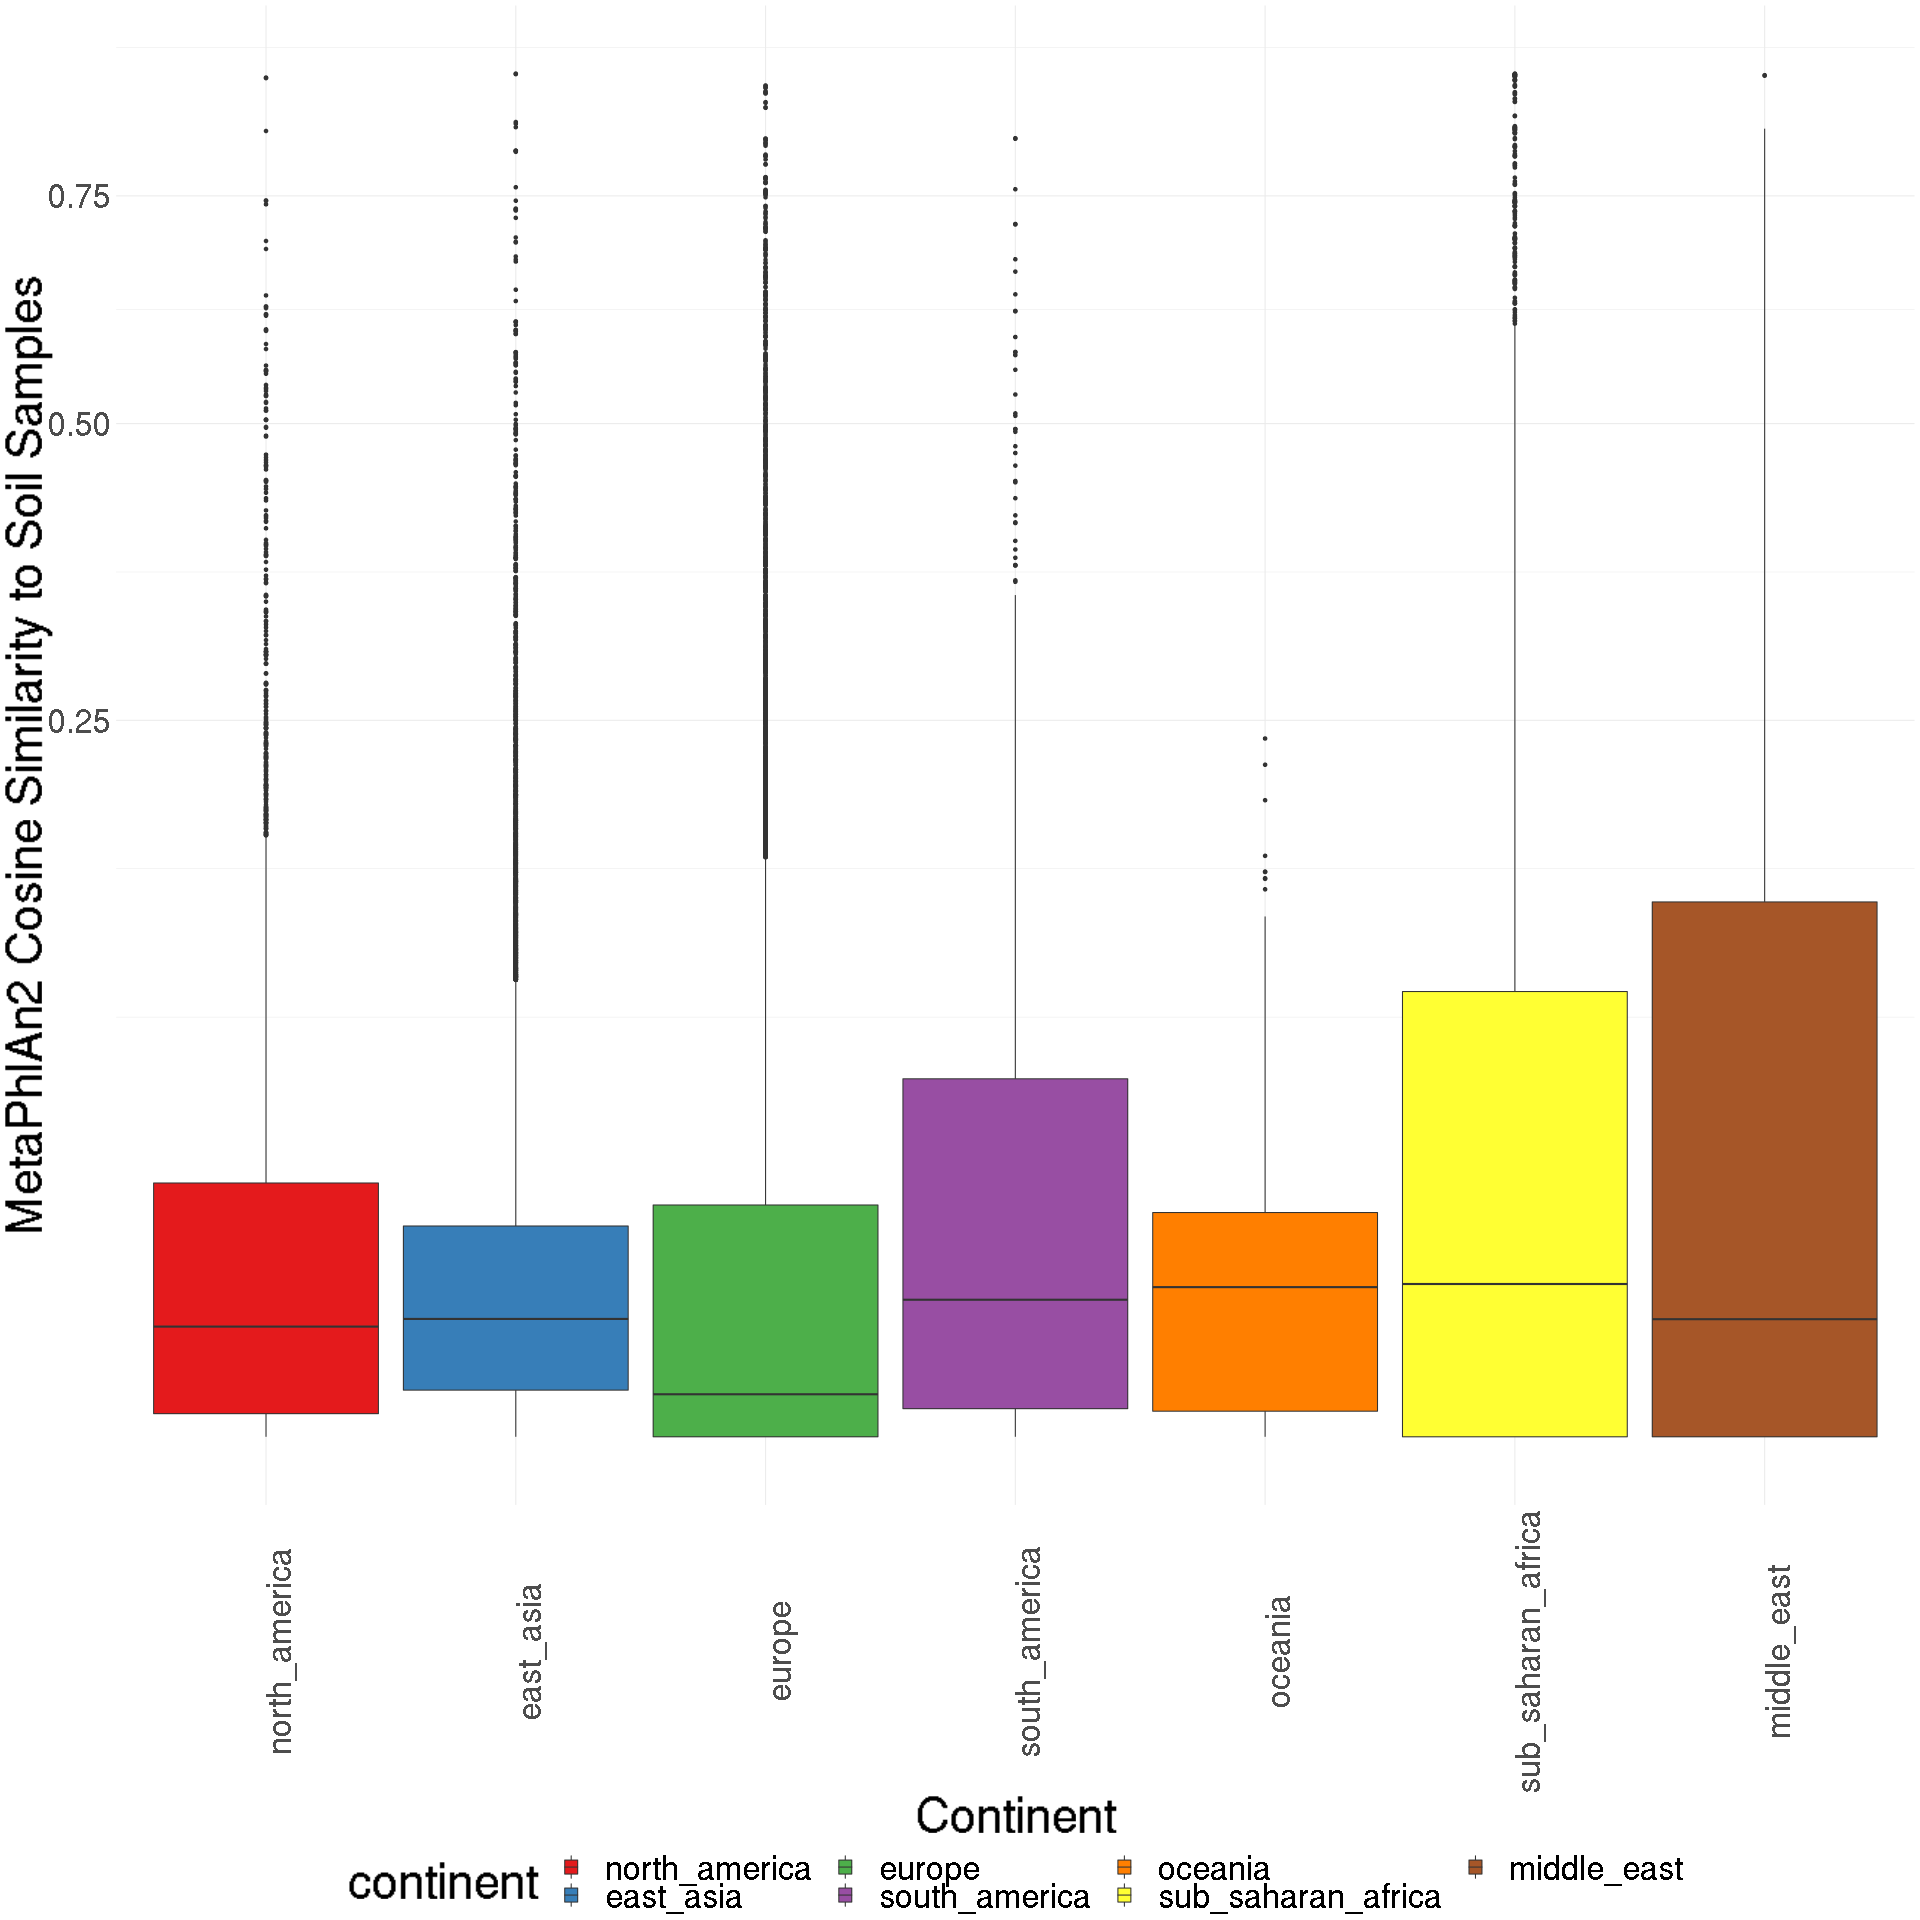

In [24]:
%%R -i soil -w 1920 -h 1920

continents =  c(
        'north_america',
        'east_asia',
        'europe',
        'south_america',
        'oceania',
        'sub_saharan_africa',
        'middle_east'
)
soil$continent = ordered(
    soil$continent,
    levels=continents
)
ggplot(soil, aes(x=continent, y=dist, fill=continent)) +
    geom_boxplot(width=0.9) +
    theme_minimal() +
    scale_y_sqrt() +
    scale_fill_brewer(palette='Set1') +
    xlab('Continent') +
    ylab('MetaPhlAn2 Cosine Similarity to Soil Samples') +
    theme(
        text = element_text(size=50),
        legend.position='bottom',
        axis.text.x= element_text(angle=90),
    )

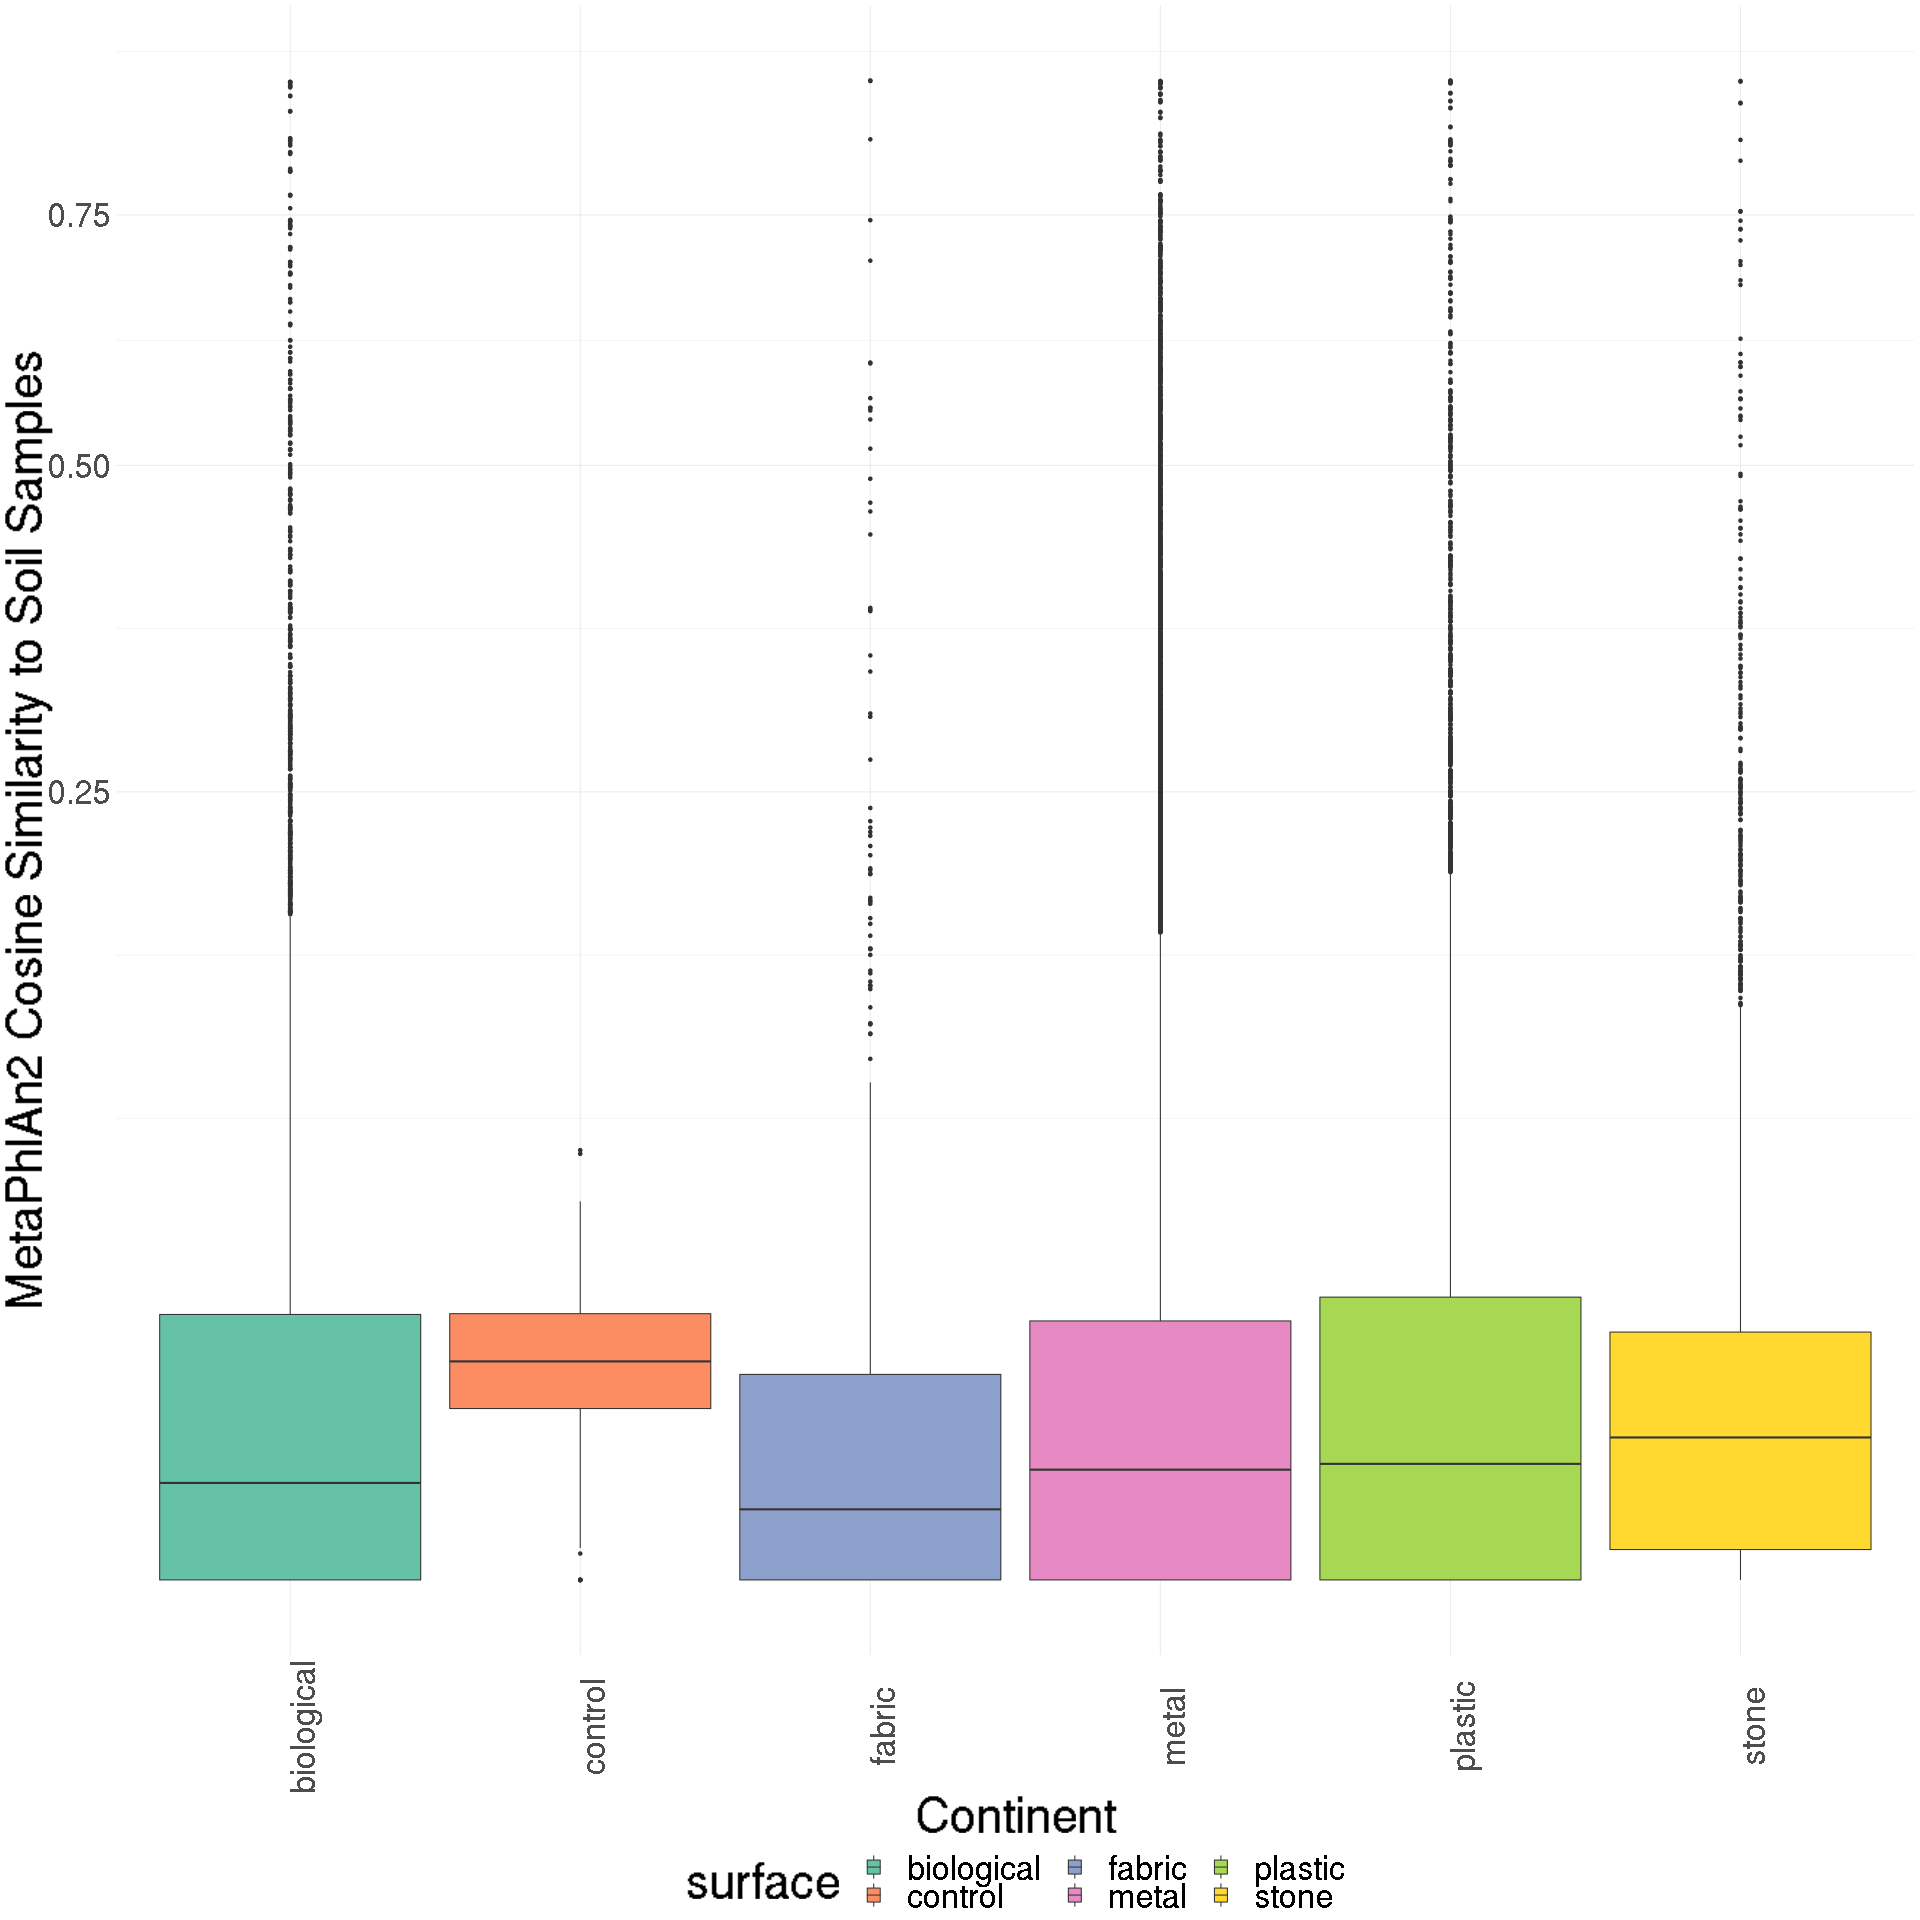

In [25]:
%%R -i soil -w 1920 -h 1920

continents =  c(
        'north_america',
        'east_asia',
        'europe',
        'south_america',
        'oceania',
        'sub_saharan_africa',
        'middle_east'
)
soil$continent = ordered(
    soil$continent,
    levels=continents
)
ggplot(soil, aes(x=surface, y=dist, fill=surface)) +
    geom_boxplot(width=0.9) +
    theme_minimal() +
    scale_y_sqrt() +
    scale_fill_brewer(palette='Set2') +
    xlab('Continent') +
    ylab('MetaPhlAn2 Cosine Similarity to Soil Samples') +
    theme(
        text = element_text(size=50),
        legend.position='bottom',
        axis.text.x= element_text(angle=90),
    )